In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

C:\Users\Ashutosh Mukherjee\AppData\Local\Temp\ipykernel_23640\3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


***

# FBS using pyFBS: a numerical case using the Virtual Point Transformation

> Francesco Trainotti $\,\,$ *francesco.trainotti@tum.de* <br>

> Advanced Structural Dynamics, DTU Copenhagen, 16-19 June 2025





***

## Introduction to pyFBS

In [2]:
import pyFBS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")

Let's showcase some basic functionalities of pyFBS such as display and creation of numerical substructures

### Display

In [4]:
view3D = pyFBS.view3D()

The 3D display opens as a background PyQt5 window. The display is responsive both through the code as well as through the interaction with it.

Now let's load some .stl files and try to display them. 

In [5]:
stl_tm = r"./automotive_testbench/STL/transmission_mount.stl"
stl_rm = r"./automotive_testbench/STL/roll_mount.stl"
stl_em = r"./automotive_testbench/STL/engine_mount.stl"

stl_rec = r"./automotive_testbench/STL/receiver.stl"
stl_ts = r"./automotive_testbench/STL/ts.stl"
stl_shaker = r"./automotive_testbench/STL/shaker_only.stl"

Adding .stl files to the view3D is pretty fast:

In [6]:
view3D.add_stl(stl_tm,name = "transmission_mount_3",color = "#83afd2",opacity = .7);
view3D.add_stl(stl_rm,name = "roll_mount_3",color = "#83afd2",opacity = .7);
view3D.add_stl(stl_em,name = "engine_mount_3",color = "#83afd2",opacity = .7);

view3D.add_stl(stl_ts,name = "ts_3",color = "#FB6D4C",opacity = .7)
view3D.add_stl(stl_rec,name = "receiver_3",color = "#e0e0e0",opacity = .7)
view3D.add_stl(stl_shaker,name = "shaker_only_3",color = "#FB6D4C",opacity = .7);

#### Load spreadsheats

With the test-structures, we also supply an example of the positioning of accelerometers and impacts. Let's load a set of them and check them out in the static display.

In [7]:
pos_xlsx = r"./automotive_testbench/Measurements/ODS.xlsx"

df_acc = pd.read_excel(pos_xlsx, sheet_name='Sensors') # Accelerometers
df_imp = pd.read_excel(pos_xlsx, sheet_name='Impacts') # Force Points

df_imp

,Name,Description,Quantity,Grouping,Position_1,Position_2,Position_3,Direction_1,Direction_2,Direction_3
0,H1,+X,NaN,NaN,0.000,0.190,0.160,1,0,0
1,H2,-X,NaN,NaN,0.400,0.010,0.310,-1,0,0
2,H3,+Y,NaN,NaN,0.190,0.000,0.150,0,1,0
3,H4,-Y,NaN,NaN,0.390,0.540,0.160,0,-1,0
4,H5,-Z,NaN,NaN,0.390,0.530,0.390,0,0,-1
5,H6,-Z,NaN,NaN,0.010,0.010,0.393,0,0,-1
6,H7,+X,NaN,NaN,0.125,0.245,0.240,1,0,0
7,H8,-X,NaN,NaN,0.340,0.460,0.240,-1,0,0
8,H9,+Y,NaN,NaN,0.336,0.242,0.250,0,1,0
9,H10,-Y,NaN,NaN,0.130,0.478,0.270,0,-1,0


#### Accelerometers
Once you have your data inside the Pandas DataFrames, you can simply add accelerometers within the 3D display

In [8]:
view3D.show_acc(df_acc,scale = 1000) # the units are in m, scale factor of 1000 is required
view3D.label_acc(df_acc,scale = 1000) # showcase the labels

#### Impacts
Adding impacts is the same as for channels and accelerometers. 

In [9]:
view3D.show_imp(df_imp,scale = 1000);
view3D.label_imp(df_imp,scale = 1000);

### Numerical models

``pyFBS.MK_model`` is a class that contains a numerical model of the analysed structure in form of mass and stiffness matrices. Currently, there are supported two ways of creating that class:
 1. Manual definition of mass and stiffness matrices and node locations with elements definition.
 2. Direct import of mass and stiffness matrix and finite element model from commercial software (currently Ansys is supported).

After the ``pyFBS.MK_model`` class initialization, there are many methods, that can be used on this object (computation of eigenfrequencies, eigenvectors, FRF generation).


#### Creating a numerical model from Ansys files
By importing the system matrices (or/and modal parameters) to pyFBS, options like mode shape animation, FRF generation, and many substructuring applications are available.

To read Ansys (input and result) files, the [``pyAnsys``](https://docs.pyansys.com/) library is used within pyFBS. Note that this is a well-written and established library that allows for connectivity between Ansys and Python.

In [10]:
rst_file_path = r"./lab_testbench/FEM/B.rst" # For system modes
full_file_path = r"./lab_testbench/FEM/B.full" # For the mass, damping and damping matrices

In [11]:
MK_ansys = pyFBS.MK_model(rst_file=rst_file_path, 
                    full_file=full_file_path, 
                    no_modes = 100, 
                    allow_pickle = True, 
                    recalculate = False,
                         scale=1000)

In [12]:
pyFBS.MK_model?

Init signature:
pyFBS.MK_model(
    rst_file=None,
    full_file=None,
    manual_mass_matrix=None,
    manual_stifenss_matrix=None,
    no_modes=100,
    allow_pickle=True,
    recalculate=False,
    scale=1,
    read_rst=False,
)
Docstring:     
Initialization of the finite element model. Mass and stiffness matrices are imported and also nodes, DoFs and complete mesh of finite elements are defined.
If parameter ``recalculate`` is ``Ture`` eigenvalues and eigenvectors are calculated. 
For faster processing by default pickle file is generated where mass and stiffness matrices are stored and also computed eigenvalues, eigenvectors and used number of modes.
If changes are detected in the mass or stiffness matrix with respect to the stored pickle file, the calculation of eigenvalues and eigenvectors is repeated.

:param rst_file: path of the .rst file exported from Ansys
:type rst_file: str
:param full_file: path of the .full file exported from Ansys
:type full_file: str
:param no_modes: 

#### Generation of FRF matrix
FRFs can only be generated in the subdomain of the existing FEM DoF locations. Note that even if a different location is selected, the algorithm will generate the FRFs at the nearest location in the model.

In [13]:
view3D = pyFBS.view3D(show_origin=True, show_axes=False)

In [14]:
stl = r"./lab_testbench/STL/B.stl"
view3D.add_stl(stl,name = "Test structure B",color = "#8FB1CC",opacity = .9);

In [15]:
# Path to .xslx file
xlsx = r"./lab_testbench/Measurements/AM_measurements.xlsx"

# Import and show locations of accelerometers
df_acc = pd.read_excel(xlsx, sheet_name='Sensors_B')
view3D.show_acc(df_acc, overwrite = True)

# Import and show directions of accelereometers channels
df_chn = pd.read_excel(xlsx, sheet_name='Channels_B')
view3D.show_chn(df_chn, overwrite = True)

# Import and show locations and directions of impacts
df_imp = pd.read_excel(xlsx, sheet_name='Impacts_B')
view3D.show_imp(df_imp, overwrite = True)


Now, we can update locations in DataFrames, to match the nearest nodes in the defined mesh. Directions of defined impact and responses will not be changed.

In [16]:
# Updating the locations of the sensors and impacts based on the node positions of the FEM Mesh
# (M & K matrices are degfined at mesh nodes only!!!!)
df_chn_update = MK_ansys.update_locations_df(df_chn)
df_imp_update = MK_ansys.update_locations_df(df_imp)

In [17]:
view3D.show_chn(df_chn_update, overwrite = False, color = "g")
view3D.show_imp(df_imp_update, overwrite = False, color = "g")

#### Modal superposition method

$$\alpha_{i, j} = \sum_{r=1}^{m}\frac{\boldsymbol{\phi}_{i,r}\,\boldsymbol{\phi}_{j,r}}{-\omega^2+2\,i\,\omega\,\xi_r\,\omega_r+\omega_r^2}\,.$$


In [18]:
MK_ansys.FRF_synth(df_chn_update, df_imp_update,
                   f_start=1, f_end=2000, f_resolution=1,
                   limit_modes=50, 
                   modal_damping=10**-2, 
                   frf_type='receptance')

You can also numerically add noise to the generated FRFs, to simulate experimental measurements. On `MK_model` for instance you can use the `add_noise` method and the resulting FRFs can be accesed as `FRF_noise`.

In [19]:
MK_ansys.add_noise(n1=2e-9, n2=2e-9, n3=2e-9, n4=5e-9)

plot FRF using matplotlib:

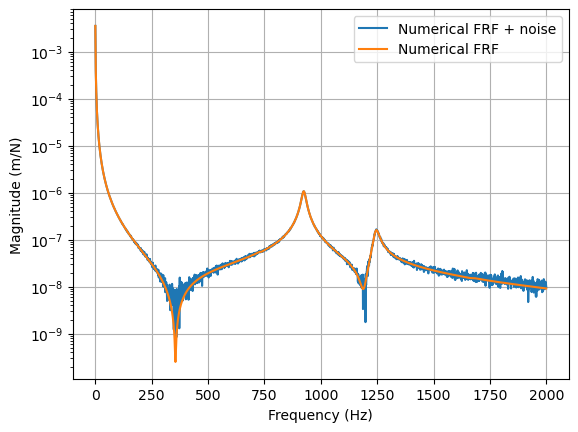

In [20]:
plt.semilogy(MK_ansys.freq, np.abs(np.abs(MK_ansys.FRF_noise[:, 0, 0])), label="Numerical FRF + noise")
plt.semilogy(MK_ansys.freq, np.abs(np.abs(MK_ansys.FRF[:, 0, 0])), label="Numerical FRF")
plt.gca().set_xlabel("Frequency (Hz)")
plt.gca().set_ylabel("Magnitude (m/N)")
plt.grid()
plt.legend()

## Importing Experimental FRF Data here

<div class="alert alert-block alert-warning">
    <i class="fa fa-question-circle" aria-hidden="true"></i>
    <b>Question:</b> What are other types of measurement error that might affect the substructuring results?
</div>

## Recap of virtual point transformation for FBS

The main challenges when coupling two substructures can be summarized with the following points:
- Non-collocated measured degrees of freedom on neighboring substructures.
- Measurement errors.

The VPT offers a solution for the abovementioned problems as follows:
- Collocation can be achieved by using common geometrical deformation shapes
- When transforming the measurements into a subset of deformation shapes, measurement errors are filtered out.

Let us consider a simple interface where the response is captured using tri-axial accelerometers and excited with unidirectional forces around the interface and the as depicted below. The virtual point is placed in the middle of the hole:

<p>
<img src="./pics/vp.png" width=1000/>
</p>

Usually the reduction space is chosen to be composed by the local rigid translations and rotations, by assuming a local rigid area spanned by sensors and impacts. All these modes are presented in the following GIFs and are known as rigid interface deformation modes (IDMs):

<table><tr>
    <td> <img src="./pics/IDM_1.gif" style="width: 200px;"/> </td>
    <td> <img src="./pics/IDM_2.gif" style="width: 200px;"/> </td>
    <td> <img src="./pics/IDM_3.gif" style="width: 200px;"/> </td>
    <td> <img src="./pics/IDM_4.gif" style="width: 200px;"/> </td>
    <td> <img src="./pics/IDM_5.gif" style="width: 200px;"/> </td>
    <td> <img src="./pics/IDM_6.gif" style="width: 200px;"/> </td>
</tr></table>

The reduction problem for the displacements is written as:

$ 
\mathbf{u} = \mathbf{R}_{\text{u}}\,\mathbf{q} + \boldsymbol{\mu} 
$

The solution is found by least square optimization (overdetermination):

$ \boldsymbol{q} = \Big( \mathbf{R}_{\text{u}}^{\text{T}}\mathbf{R}_{\text{u}} \Big)^{-1} \mathbf{R}_{\text{u}}^{\text{T}}\boldsymbol{u} = \left( \mathbf{R}_{\text{u}} \right)^+ \boldsymbol{u}
 $

Note that one can check the consistency of the transformation, i.e. how well the space of IDMs is capable of representing the original measurements by comparing $\boldsymbol{u}$ with the filtered $\bar{\boldsymbol{u}}= \mathbf{R}_{\text{u}}\left( \mathbf{R}_{\text{u}} \right)^+ \boldsymbol{u}$

And analogously for the reduction of the measured forces we get $\mathbf{R}_{\text{f}}$.

With both transformation matrices, virtual point FRFs can be computed using:

$ \mathbf{Y}_{\text{qm}} = \left(\mathbf{R}_{\text{u}} \right)^+  \mathbf{Y}_{\text{uf}} {\left(\mathbf{R}_{\text{f}}^{\text{T}}\right)}^+ $

where $\mathbf{Y}_{\text{uf}}$ is the measured FRF matrix and $\mathbf{Y}_{\text{qm}}$ is the full-DoF VP FRF matrix with perfectly collocated motions and loads. 

Lastly the LM-FBS equations can be used to couple the substructures using the collocated virtual DoFs


$\boldsymbol{q}=(\mathbf{Y}_{qm}^\mathrm{A|B}-\mathbf{Y}_{qm}^\mathrm{A|B}\mathbf{B}^\mathrm{T}\left(\mathbf{B}\mathbf{Y}_{qm}^\mathrm{A|B}\mathbf{B}^\mathrm{T}\right)^{-1}\mathbf{B}\mathbf{Y}_{qm}^\mathrm{A|B})\boldsymbol{m}$


where the Boolean is now adapted to compatibilize the virtual point coordinates.

## LM-FBS coupling in pyFBS with VPT

### Data Import
Load the required predefined datasets:

In [21]:
stl_dir_A = r"./lab_testbench/STL/A.stl"
stl_dir_B = r"./lab_testbench/STL/B.stl"
stl_dir_AB = r"./lab_testbench/STL/AB.stl"

pos_xlsx = r"./lab_testbench/Measurements/coupling_example.xlsx"

df_acc_A = pd.read_excel(pos_xlsx, sheet_name='Sensors_A')
df_chn_A = pd.read_excel(pos_xlsx, sheet_name='Channels_A')
df_imp_A = pd.read_excel(pos_xlsx, sheet_name='Impacts_A')

df_acc_B = pd.read_excel(pos_xlsx, sheet_name='Sensors_B')
df_chn_B = pd.read_excel(pos_xlsx, sheet_name='Channels_B')
df_imp_B = pd.read_excel(pos_xlsx, sheet_name='Impacts_B')

df_acc_AB = pd.read_excel(pos_xlsx, sheet_name='Sensors_AB')
df_chn_AB = pd.read_excel(pos_xlsx, sheet_name='Channels_AB')
df_imp_AB = pd.read_excel(pos_xlsx, sheet_name='Impacts_AB')

## 3D view
Open 3D viewer in the background. With the 3D viewer the subplot capabilities of [PyVista](https://docs.pyvista.org/index.html) can be exploited.

In [22]:
view3D = pyFBS.view3D(show_origin = False, show_axes = False, shape = (1,3), title = "Overview")

In [23]:
view3D.plot.subplot(0,0)
view3D.plot.isometric_view()
view3D.plot.add_text("A structure", position='upper_left', font_size=10, color="k", font="times", name="A_structure")

view3D.add_stl(stl_dir_A,color = "#83afd2",name = "A");
view3D.show_acc(df_acc_A,scale = 1000)
view3D.show_imp(df_imp_A,scale = 1000)
view3D.show_chn(df_chn_A,scale = 1000)

In [24]:
view3D.plot.subplot(0,1)
view3D.plot.isometric_view()
view3D.plot.add_text("B structure", position='upper_left', font_size=10, color="k", font="times", name="B_structure")

view3D.add_stl(stl_dir_B,color = "#83afd2",name = "B");
view3D.show_acc(df_acc_B,scale = 1000,overwrite = False)
view3D.show_imp(df_imp_B,scale = 1000,overwrite = False)
view3D.show_chn(df_chn_B,scale = 1000,overwrite = False)

In [25]:
view3D.plot.subplot(0,2)
view3D.plot.isometric_view()
view3D.plot.add_text("AB structure", position='upper_left', font_size=10, color="k", font="times", name="AB_structure");

view3D.add_stl(stl_dir_AB,color = "#83afd2",name = "AB");
view3D.show_acc(df_acc_AB,scale = 1000,overwrite = False)
view3D.show_imp(df_imp_AB,scale = 1000,overwrite = False)
view3D.show_chn(df_chn_AB,scale = 1000,overwrite = False)

In [26]:
view3D.plot.link_views()
#view3D.plot.unlink_views()

## Numerical model
Load the corresponding .full and .rst file from the example datasets. 

In [27]:
full_file_AB = r"./lab_testbench/FEM/AB.full"
ress_file_AB = r"./lab_testbench/FEM/AB.rst"

full_file_B = r"./lab_testbench/FEM/B.full"
ress_file_B = r"./lab_testbench/FEM/B.rst"

full_file_A = r"./lab_testbench/FEM/A.full"
ress_file_A = r"./lab_testbench/FEM/A.rst"

Create MK models:

In [28]:
MK_A = pyFBS.MK_model(ress_file_A,full_file_A,no_modes = 100,allow_pickle= True,recalculate = False,scale=1)
MK_B = pyFBS.MK_model(ress_file_B,full_file_B,no_modes = 100,allow_pickle= True,recalculate = False,scale=1)
MK_AB = pyFBS.MK_model(ress_file_AB,full_file_AB,no_modes = 100,allow_pickle= True,recalculate = False,scale=1)

Update locations of channels and impacts to snap to the nearest FE node.

In [29]:
df_chn_A_up = MK_A.update_locations_df(df_chn_A,scale=1)
df_imp_A_up = MK_A.update_locations_df(df_imp_A,scale=1)

df_chn_B_up = MK_B.update_locations_df(df_chn_B,scale=1)
df_imp_B_up = MK_B.update_locations_df(df_imp_B,scale=1)

df_chn_AB_up = MK_AB.update_locations_df(df_chn_AB,scale=1)
df_imp_AB_up = MK_AB.update_locations_df(df_imp_AB,scale=1)

## Virtual Points in Substructures A and B
Virtual Points in Substructure A -> Grouping 10 (Grouping 1 doesn't need to be correlated)
Virtual Points in Substructure B -> Grouping 10 (Grouping 100 doesn't need to be correlated)
All nodes with Grouping 10 get assembled into the virtual point -> only 6 points from each substructure with grouping 10


In [71]:
df_chn_A_up

,index,Name,Description,Quantity,Grouping,Position_1,Position_2,Position_3,Direction_1,Direction_2,Direction_3
0,0,S1 X,NaN,NaN,1,-0.075540,0.141570,0.017,7.050572e-01,7.091504e-01,0.000000e+00
1,1,S1 Y,NaN,NaN,1,-0.075540,0.141570,0.017,-7.091504e-01,7.050572e-01,0.000000e+00
2,2,S1 Z,NaN,NaN,1,-0.075540,0.141570,0.017,0.000000e+00,0.000000e+00,1.000000e+00
3,3,S2 X,NaN,NaN,1,-0.040096,0.280546,0.017,6.391911e-01,-7.690479e-01,0.000000e+00
4,4,S2 Y,NaN,NaN,1,-0.040096,0.280546,0.017,7.690479e-01,6.391911e-01,0.000000e+00
5,5,S2 Z,NaN,NaN,1,-0.040096,0.280546,0.017,0.000000e+00,0.000000e+00,1.000000e+00
6,6,S3 X,NaN,NaN,10,0.038415,0.327061,0.007,6.610272e-03,5.546573e-03,-9.999628e-01
7,7,S3 Y,NaN,NaN,10,0.038415,0.327061,0.007,-6.427879e-01,7.660442e-01,-8.303558e-08
8,8,S3 Z,NaN,NaN,10,0.038415,0.327061,0.007,7.660157e-01,6.427640e-01,8.629030e-03
9,9,S4 X,NaN,NaN,10,0.051000,0.357202,0.007,6.427878e-01,-7.660443e-01,3.106271e-11


Perform the FRF synthetization for each component based on the updated locations.

In [31]:
# Synthesize Receptance FRFs for A, B and AB with range [1-2000] Hz, resolution 1 Hz, using 100 modes and modal damping = 0.3%

MK_A.FRF_synth(df_chn_A_up,df_imp_A_up,f_start = 0,modal_damping = 0.003)
MK_B.FRF_synth(df_chn_B_up,df_imp_B_up,f_start = 0,modal_damping = 0.003)
MK_AB.FRF_synth(df_chn_AB_up,df_imp_AB_up,f_start = 0,modal_damping = 0.003)

## Virtual point transformation
It would be impractical to measure interface admittance for both substructures in multiple DoFs at the interface. Therefore we adopt VPT in order to obtain a collocated full-DoF interface admittance matrix for each substructure.

## Internal DOFs
DOFs which don't lie at the interface and don't need to be constrained for comapatibility [their number don't change since they are not projected to the virtual points].

Load the virtual point informations.

In [32]:
df_vp = pd.read_excel(pos_xlsx, sheet_name='VP_Channels')
df_vpref = pd.read_excel(pos_xlsx, sheet_name='VP_RefChannels')

In [33]:
df_vp

,Grouping,Quantity,Name,Description,Position_1,Position_2,Position_3,Direction_1,Direction_2,Direction_3
0,10,Acceleration,VP1_ux,ux,0.038895,0.348107,0.007,1,0,0
1,10,Acceleration,VP1_uy,uy,0.038895,0.348107,0.007,0,1,0
2,10,Acceleration,VP1_uz,uz,0.038895,0.348107,0.007,0,0,1
3,10,Rotational acceleration,VP1_rx,rx,0.038895,0.348107,0.007,1,0,0
4,10,Rotational acceleration,VP1_ry,ry,0.038895,0.348107,0.007,0,1,0
5,10,Rotational acceleration,VP1_rz,rz,0.038895,0.348107,0.007,0,0,1


Create the transformation matrices:

In [34]:
vpt_A = pyFBS.VPT(df_chn_A_up,df_imp_A_up,df_vp,df_vpref)
vpt_B = pyFBS.VPT(df_chn_B_up,df_imp_B_up,df_vp,df_vpref)

Apply the defined VP transformation on the FRFs:

In [35]:
vpt_A.apply_VPT(MK_A.freq,MK_A.FRF)
vpt_B.apply_VPT(MK_B.freq,MK_B.FRF)

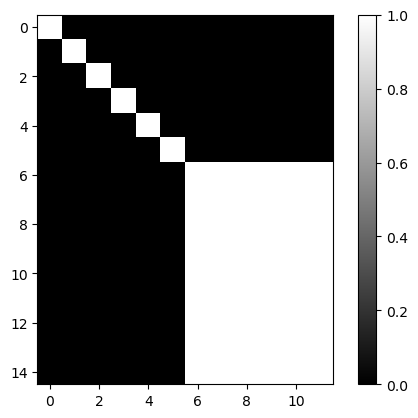

In [36]:
plt.figure()
plt.imshow(vpt_A.Ru.astype(bool), cmap='gray', interpolation='none')
plt.colorbar()  # Optional: remove if you don't want the color scale
plt.show()

Extract the required transformed FRFs and the frequency vector:

In [37]:
freq = MK_A.freq
Y_A = vpt_A.vptData
Y_B = vpt_B.vptData

### Measurement quality indicators

Let's compare $\boldsymbol{u}$ with the filtered $\bar{\boldsymbol{u}}= \mathbf{R}_{\text{u}}\left( \mathbf{R}_{\text{u}} \right)^+ \boldsymbol{u}$ (and similarly for the forces) using DoF-specific and averaging criteria. For simplicity, let us check only subsystem A.

In [38]:
vpt_A.consistency([10],[10])

In [39]:
spec_chn = pyFBS.barchart(np.arange(1,10,1), vpt_A.specific_sensor, color='steelblue', title='Specific Channel Consistency')
spec_imp = pyFBS.barchart(np.arange(1,13,1), vpt_A.specific_impact, color='firebrick', title='Specific Impact Consistency')
spec_chn | spec_imp

alt.HConcatChart(...)

In [40]:
pyFBS.plot_coh(vpt_A.freq, vpt_A.overall_sensor, color='steelblue', title='Overall Channel Consistency')

alt.Chart(...)

In [41]:
pyFBS.plot_coh(vpt_A.freq, vpt_A.overall_impact, color='firebrick', title='Overall Impact Consistency')

alt.Chart(...)

<div class="alert alert-block alert-warning">
    <i class="fa fa-question-circle" aria-hidden="true"></i>
    <b>Question:</b> Are these consistency plots enough to determine the suitability of the VPT for a subcomponent?
</div>

## LM-FBS Coupling

First, construct an admittance matrix for the uncoupled system, containing substructure admittances:

$$\mathbf{Y}^\text{A|B} = \begin{bmatrix} 
\mathbf{Y}^\text{A} & \mathbf{0} \\
\mathbf{0} & \mathbf{Y}^\text{B}
\end{bmatrix}.$$

In [42]:
Y_AnB = np.zeros((Y_A.shape[0],Y_A.shape[1]+Y_B.shape[1],Y_A.shape[2]+Y_B.shape[2]), dtype=complex)

Y_AnB[:,:Y_A.shape[1],:Y_A.shape[2]] = Y_A
Y_AnB[:,Y_A.shape[1]:,Y_A.shape[2]:] = Y_B

Next the compatibility and the equilibrium conditions has to be defined through the signed Boolean matrices ``Bu`` and ``Bf``. 

$$\mathbf{B}_\text{u}\,\boldsymbol{u} = \mathbf{0}$$
$$\boldsymbol{g} = - \mathbf{B}_\text{f}^\text{T} \boldsymbol{\lambda}$$

Make sure that the correct DoFs are selected for the coupling. In the following example the 6 virtual/generalized DoFs at the interface are matched, so the size of the Boolean matrix should be 6 $\times$ 30 (30 is the sum of all DoFs from both substructures A and B).

In [43]:
k = 6 # number of collocated DoFs at the interface

# Define the Boolean matrix for the compatibility and equilibrium conditions. Hint: Check the order and grouping index of displacements in A and B.
Bu = np.zeros((k,Y_A.shape[1]+Y_B.shape[1]))

startIndex = 6; # 7th Column (first virtual point DOF of A)
Bu[:,startIndex:startIndex + 6] = np.identity(6)
startIndex = startIndex + 6
Bu[:,startIndex: startIndex + 6] = -np.identity(6)


# Define the Boolean matrix for the equilibrium conditions. Hint: Check the order and grouping index of forces in A and B.
Bf = np.zeros((k,Y_A.shape[2]+Y_B.shape[2]))
startIndex = 6; # 7th Column (first virtual point DOF of A)
Bf[:,startIndex:startIndex + 6] = np.identity(6)
startIndex = startIndex + 6
Bf[:,startIndex: startIndex + 6] = -np.identity(6)

### missing code here ###


In [63]:
Y_AnB.shape

(2000, 30, 30)

Text(0, 0.5, 'Number of \n compatibility \n conditions')

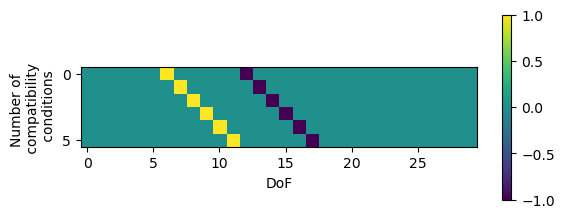

In [45]:
# visualize your Boolean matrix for verification

plt.figure()
plt.imshow(Bu)
plt.colorbar(shrink=0.5)
plt.xlabel('DoF')
plt.ylabel('Number of \n compatibility \n conditions')

Text(0, 0.5, 'Number of \n compatibility \n conditions')

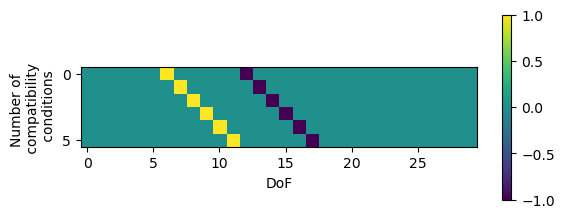

In [46]:
# visualize your Boolean matrix for verification

plt.figure()
plt.imshow(Bf)
plt.colorbar(shrink=0.5)
plt.xlabel('DoF')
plt.ylabel('Number of \n compatibility \n conditions')

For the LM-FBS method, having defined $\mathbf{Y^{\text{A|B}}}$, $\mathbf{B}_\text{u}$ and $\mathbf{B}_\text{f}$ is already sufficient to perform coupling:

In [47]:
Y_ABn = np.zeros_like(Y_AnB,dtype = complex)

Y_ABn = Y_AnB - Y_AnB@Bf.T@np.linalg.inv(Bu@Y_AnB@Bf.T)@Bu@Y_AnB

In [48]:
np.linalg.inv(Bu@Y_AnB@Bf.T)

array([[[ 6.79701693e-05+4.59692380e-07j,
          2.18418388e-05+2.64063273e-08j,
          2.52370862e-06-5.19382587e-09j,
         -1.29937761e-07+5.88908551e-10j,
         -2.52625136e-06-3.15846919e-09j,
          1.05047069e-05+2.79786168e-08j],
        [ 2.18418388e-05+2.64063273e-08j,
          5.90364452e-05+4.00510528e-07j,
          3.68475215e-05+7.65642555e-08j,
         -2.13428475e-06-4.05511611e-09j,
         -8.10183308e-06-1.51895376e-08j,
          1.90134898e-05+7.05754471e-08j],
        [ 2.52370862e-06-5.19382587e-09j,
          3.68475215e-05+7.65642555e-08j,
          5.79481253e-05+4.21361914e-07j,
         -1.95511430e-07-1.08247780e-08j,
         -1.02217136e-05-6.05208737e-08j,
          6.42547686e-06+1.15100684e-08j],
        [-1.29937761e-07+5.88908551e-10j,
         -2.13428475e-06-4.05511611e-09j,
         -1.95511430e-07-1.08247780e-08j,
          9.85449764e-08+1.13300732e-09j,
          3.24274250e-07+2.34264087e-09j,
         -5.17132534e-07-8.3506

## Results
First extract the FRFs at the reference DoFs:

In [66]:
# Which output and input DoFs should be kept? Hint: keep only the internal DoFs that will be used for validation!

arr_coupA = range(0,6)
arr_coupB = range(17,30)

Y_AB_coupled = Y_ABn[:,arr_coupA,:][:,:,arr_coupB]

In [59]:
aa = range(17,-1)
aa[1]

IndexError: range object index out of range

The coupled and the reference results of the assembled system AB can then be compared:

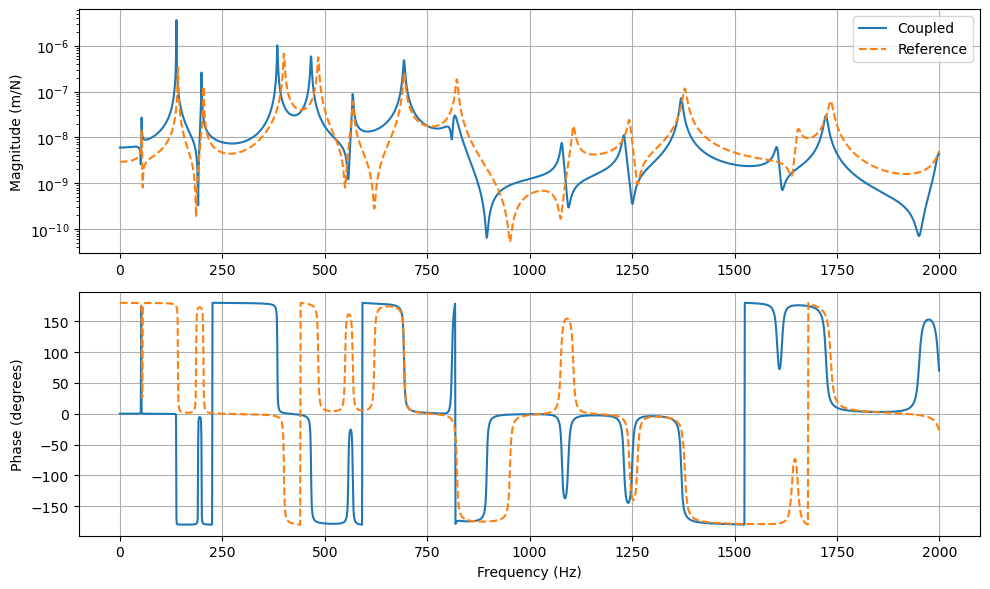

In [67]:
out = 1
inp = 6

freq = MK_AB.freq
coupled_response = Y_AB_coupled[:, out, inp]
reference_response = MK_AB.FRF[:, out, inp]

# Plot the magnitude
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.semilogy(freq, (np.abs(coupled_response)), label='Coupled')
plt.semilogy(freq, (np.abs(reference_response)), label='Reference', linestyle='--')
plt.ylabel('Magnitude (m/N)')
plt.legend()
plt.grid(True)

# Plot the phase
plt.subplot(2, 1, 2)
plt.plot(freq, np.angle(coupled_response, deg=True), label='Coupled')
plt.plot(freq, np.angle(reference_response, deg=True), label='Reference', linestyle='--')
plt.ylabel('Phase (degrees)')
plt.xlabel('Frequency (Hz)')
plt.grid(True)

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">
    <i class="fa fa-question-circle" aria-hidden="true"></i>
    <b>Question:</b> Why is the numerical noise-free result not perfect?
</div>